In [8]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('../data/adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data['income']=data['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
data = pd.get_dummies(data)
data.head(5)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
Y = data["income"]
X = data.drop('income', axis=1)
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from matplotlib import pyplot as plt

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Первая модель классификации DecisionTreeClassifier. 
### Подбираем параметр: max_depth: от 1 до 20 

In [17]:
params = [ {'max_depth': list( range(1, 20) )} ]
gs = GridSearchCV( DecisionTreeClassifier(), param_grid = params, scoring = 'accuracy', return_train_score = False )

In [19]:
gs.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19]}],
             scoring='accuracy')

In [23]:
#gs.cv_results_
gs.best_params_

{'max_depth': 10}

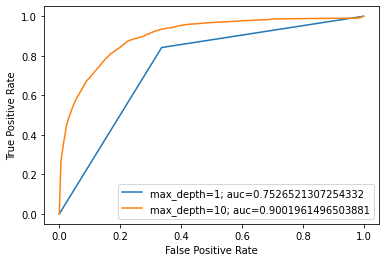

In [28]:
# С произвольным параметром
gs1 = DecisionTreeClassifier(max_depth = 1).fit( X_train, Y_train )
predictions1 = gs1.predict_proba( X_test )
fpr1, tpr1, thres1 = roc_curve( Y_test, predictions1[:, 1] )
auc1 = roc_auc_score(Y_test, predictions1[:, 1])

# С оптимальным параметром
gs2 = DecisionTreeClassifier(max_depth = 10).fit( X_train, Y_train )
predictions2 = gs2.predict_proba( X_test )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
auc2 = roc_auc_score(Y_test, predictions2[:, 1])


plt.plot( fpr1, tpr1, label = 'max_depth=1; auc={}'.format(auc1) )
plt.plot( fpr2, tpr2, label = 'max_depth=10; auc={}'.format(auc2) )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

## Вторая модель классификации KNeighborsClassifier. 
### Подбираем параметр: n_neighbors: от 1 до 20 

In [29]:
params = [ {'n_neighbors': list( range(1, 20) )} ]
gs10 = GridSearchCV( KNeighborsClassifier(), param_grid = params, scoring = 'accuracy', return_train_score = False )

In [30]:
gs10.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]}],
             scoring='accuracy')

In [31]:
gs10.best_params_

{'n_neighbors': 18}

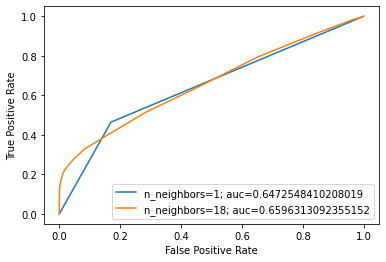

In [33]:
# С произвольным параметром
gs11 = KNeighborsClassifier(n_neighbors = 1).fit( X_train, Y_train )
predictions11 = gs11.predict_proba( X_test )
fpr11, tpr11, thres11 = roc_curve( Y_test, predictions11[:, 1] )
auc11 = roc_auc_score(Y_test, predictions11[:, 1])

# С оптимальным параметром
gs12 = KNeighborsClassifier(n_neighbors = 18).fit( X_train, Y_train )
predictions12 = gs12.predict_proba( X_test )
fpr12, tpr12, thres12 = roc_curve( Y_test, predictions12[:, 1] )
auc12 = roc_auc_score(Y_test, predictions12[:, 1])


plt.plot( fpr11, tpr11, label = 'n_neighbors=1; auc={}'.format(auc11) )
plt.plot( fpr12, tpr12, label = 'n_neighbors=18; auc={}'.format(auc12) )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

## Третья модель классификации LogisticRegression. 
### Подбираем два параметра: penalty = l1 или l2 и C: от 0.1  до 10 


In [85]:
s = np.logspace(-1, 2, num = 20, base = 10)
params = [{'C':s}]
params = [{'penalty':["l1","l2"]}]
params = [{'penalty':["l1","l2"], 'C':s}]
gs20 = GridSearchCV( LogisticRegression( solver='liblinear' ), param_grid = params, scoring = 'accuracy', return_train_score = False )

In [86]:
gs20.fit(X_train, Y_train)

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'C': array([  0.1       ,   0.14384499,   0.20691381,   0.29763514,
         0.42813324,   0.61584821,   0.88586679,   1.27427499,
         1.83298071,   2.6366509 ,   3.79269019,   5.45559478,
         7.8475997 ,  11.28837892,  16.23776739,  23.35721469,
        33.59818286,  48.32930239,  69.51927962, 100.        ]),
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [87]:
gs20.best_params_

{'C': 1.2742749857031335, 'penalty': 'l1'}

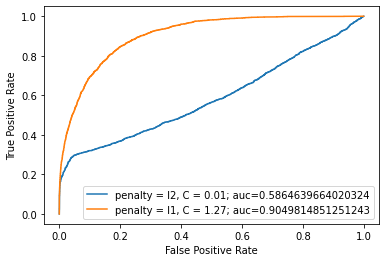

In [88]:
# С произвольным параметром
gs21 = LogisticRegression( penalty = 'l2', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictions21 = gs21.predict_proba( X_test )
fpr21, tpr21, thres21 = roc_curve( Y_test, predictions21[:, 1] )
auc21 = roc_auc_score(Y_test, predictions21[:, 1])

# С оптимальным параметром
gs22 = LogisticRegression( penalty = 'l1', C = 1.2742749857031335, solver='liblinear' ).fit( X_train, Y_train )
predictions22 = gs22.predict_proba( X_test )
fpr22, tpr22, thres22 = roc_curve( Y_test, predictions22[:, 1] )
auc22 = roc_auc_score(Y_test, predictions22[:, 1])


plt.plot( fpr21, tpr21, label = 'penalty = l2, C = 0.01; auc={}'.format(auc21) )
plt.plot( fpr22, tpr22, label = 'penalty = l1, C = 1.27; auc={}'.format(auc22) )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()